In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

定义感知器

In [2]:
class Perceptron(object):
    """Perceptron classfier"""
    
    def __init__(self, eta=0.01, n_iter=10):
        '''
        eta : float
            学习率 (0-1)
        n_iter : int
            训练次数
        '''
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        '''拟合训练集
        X : array-like, shape=[n_samples, n_features]
            训练集矩阵
        y : array-like, shape=[n_samples]
            目标值向量
        '''
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        
        return self
    
    def net_input(self, X):
        """计算净输入"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """返回类标"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)
    

加载鸢尾花数据集,并显示最后5条数据

In [5]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


提取前100个类标, 有50个setosa和50个versicolor, 分别用-1(setaso)和1(versicolor)来替代, 把结果存入y, 

类似地提取这100个训练样本的第一列(sepal length萼片长度)和第三列(petal length花瓣长度)特征, 赋值给属性X.

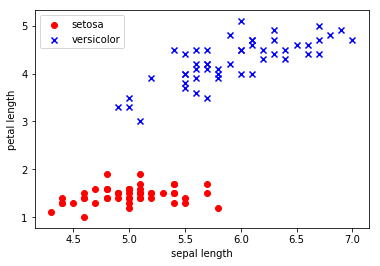

In [13]:
y = df.iloc[:100,4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[:100, [0, 2]].values
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:, 0], X[50:, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')